In [1]:
# Description: Plot Figure 2 (Energy transfer terms as functions of mean jet lateral scale in flat-bottom experiments).
# Author:      André Palóczy
# E-mail:      paloczy@gmail.com
# Date:        March/2022

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

def align_zeros(axes):
    """
    Source: https://stackoverflow.com/a/68869054
    """
    ylims_current = {}   #  Current ylims
    ylims_mod     = {}   #  Modified ylims
    deltas        = {}   #  ymax - ymin for ylims_current
    ratios        = {}   #  ratio of the zero point within deltas

    for ax in axes:
        ylims_current[ax] = list(ax.get_ylim())
                        # Need to convert a tuple to a list to manipulate elements.
        deltas[ax]        = ylims_current[ax][1] - ylims_current[ax][0]
        ratios[ax]        = -ylims_current[ax][0]/deltas[ax]

    for ax in axes:      # Loop through all axes to ensure each ax fits in others.
        ylims_mod[ax]     = [np.nan,np.nan]   # Construct a blank list
        ylims_mod[ax][1]  = max(deltas[ax] * (1-np.array(list(ratios.values()))))
                        # Choose the max value among (delta for ax)*(1-ratios),
                        # and apply it to ymax for ax
        ylims_mod[ax][0]  = min(-deltas[ax] * np.array(list(ratios.values())))
                        # Do the same for ymin
        ax.set_ylim(tuple(ylims_mod[ax]))

In [3]:
plt.close("all")

ht = 0
N = 256
kt = 10
allF1s = np.array([25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 325, 350, 375, 400])

F1s, hts, mom1s, thicks = np.array([]), np.array([]), np.array([]), np.array([])
momthickratios, sigmas, keratios = np.array([]), np.array([]), np.array([])

In [4]:
for F1 in allF1s:
    fname = "../../simulations/lin_N%d_ht%d_F1%d_%s%d.npz"%(N, 0, F1, "cosi", kt)
    d = np.load(fname)
    mom1 = d["mom1"]
    thick = d["thick"]
    momthickratio = mom1/thick
    sigma = d["sigma"]
    # keratio = d["ke1"][-1]/d["ke2"][-1]
    keratio = d["keratio"]
    print(F1, ht, momthickratio, sigma, keratio)
    mom1s = np.append(mom1s, mom1)
    thicks = np.append(thicks, thick)
    momthickratios = np.append(momthickratios, momthickratio)
    sigmas = np.append(sigmas, sigma)
    keratios = np.append(keratios, keratio)
    F1s = np.append(F1s, F1)
    hts = np.append(hts, ht)

25 0 0.6390930770315493 0.9285603253609551 3.95014703682958
50 0 0.22498362577365935 1.0677794265513434 2.721284047085194
75 0 0.03577445281412502 1.773647680742613 1.5195814800490877
100 0 0.007791833917442423 2.117115088611314 1.4887353011916598
125 0 -0.005033772659673891 2.3253222682928367 1.4713605145300697
150 0 -0.03416058390906717 2.529896722123052 1.2943813922871645
175 0 -0.05197693185998202 2.9429853173279845 1.1902364878482783
200 0 -0.04925619239002475 3.263114114361855 1.1849235969947136
225 0 -0.0461307364596638 3.493690127510508 1.1853846605511924
250 0 -0.045983863158353774 3.657164513821286 1.1737685167616865
275 0 -0.05059442954380883 3.847102697636899 1.1403568373295003
300 0 -0.05337514733913401 4.110160329666009 1.1152237552677087
325 0 -0.05201131051848262 4.37995666896844 1.1066479410642223
350 0 -0.04929364527907259 4.616476827540879 1.1046823569264435
375 0 -0.04686054675546836 4.8098695328074115 1.1034188623944015
400 0 -0.045537923976669406 4.971389136871465

In [5]:
LjonLd = np.sqrt(F1s/25)
fac_mom1, fac_thick = 1e4, 1e3

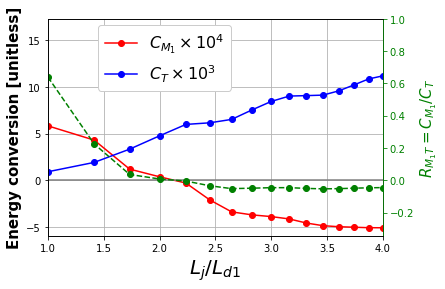

In [6]:
fig, ax = plt.subplots()
ax.plot(LjonLd, mom1s*fac_mom1, "r", marker="o", label=r"$C_{M_1} \times 10^4$")
ax.plot(LjonLd, thicks*fac_thick, "b", marker="o", label=r"$C_T \times 10^3$")
ax.set_xlabel(r"$L_j/L_d$", fontsize=12, fontweight="black")
ax.set_ylabel(r"Energy conversion [unitless]", fontsize=15, fontweight="black")
ax.grid()
ax.set_xlim(LjonLd[0], LjonLd[-1])
ax2y = ax.twinx()
ax2y.plot(LjonLd, momthickratios, color="g", linestyle="dashed", marker="o")
ax2y.set_ylabel(r"$R_{M_1T} = C_{M_1}/C_T$", color="g", fontsize=15, fontweight="black")
ax2y.spines["right"].set_color("g")
ax2y.tick_params(axis="y", colors="g")
ax.set_xlabel(r"$L_j/L_{d1}$", fontsize=20, fontweight="black")
ax.axhline(color="gray", linestyle="solid")
ax.set_ylim(-6, 13)
ax2y.set_ylim(-0.1, 1)
align_zeros([ax, ax2y])
ax.legend(fontsize=16, frameon=True, framealpha=1, loc=(0.15, 0.67))
fig.savefig("fig02.png", bbox_inches="tight")

plt.show()